In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
df=pd.read_csv('Bengaluru_House_Data.csv')

In [4]:
df.shape

(13320, 9)

In [5]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## Data Cleaning

In [6]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
df.isnull().sum()/len(df)*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [8]:
#since society has many null values almost 41% we can drop society column

In [9]:
df.drop('society',axis=1,inplace=True)

In [10]:
df.head(2)

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00


In [11]:
df.nunique()

area_type          4
availability      81
location        1305
size              31
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [12]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [13]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [14]:
## Since area_type and Availability doesnt make any sense to price prediction we can drop them

In [15]:
df=df.drop(['area_type','availability'],axis=1)

In [16]:
df.head(2)

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00


In [17]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [18]:
df1=df.copy()

In [19]:
df1.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [20]:
df1['balcony'].fillna(df1['balcony'].mode()[0],inplace=True)

In [21]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [22]:
## We can drop null values rows 

In [23]:
df1.shape

(13320, 6)

In [24]:
df1.dropna(inplace=True)

In [25]:
df1.shape

(13246, 6)

## Feature Engineering

In [26]:
## Adding new feature by converting from object datatype to integer

In [27]:
df1['BHK_size']=df1['size'].apply(lambda x: int(x.split(' ')[0])) 

In [28]:
df1.sample(5)

,location,size,total_sqft,bath,balcony,price,BHK_size
10757,Chikkalasandra,3 BHK,1355,3.0,2.0,54.20,3
2889,Shikaripalya,2 BHK,1121,2.0,1.0,43.72,2
12453,Sector 2 HSR Layout,2 BHK,1231,2.0,3.0,66.00,2
6224,Subramanyapura,2 BHK,929,2.0,1.0,56.00,2
4492,Meenakshi Layout,8 Bedroom,1200,7.0,0.0,220.00,8


In [29]:
df1=df1.drop('size',axis=1)

In [30]:
df1.head(2)

,location,total_sqft,bath,balcony,price,BHK_size
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4


In [31]:
df1['location'].nunique()

1304

In [32]:
## Removing leading and trail spaced from location column

In [33]:
df1['location']=df1['location'].str.strip()

In [34]:
df1['location'].nunique()

1293

In [35]:
## total_sqft has object values instaed of float/int we need to check

In [36]:
df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [37]:
df1.sample(5)

,location,total_sqft,bath,balcony,price,BHK_size
5814,Whitefield,905,1.0,1.0,50.00,1
5384,Yeshwanthpur,670,1.0,1.0,36.85,1
9851,Sarjapur Road,4000,5.0,1.0,578.00,4
6604,Harlur,1864,3.0,1.0,140.00,3
7495,Subramanyapura,600,3.0,1.0,69.00,3


In [38]:
def is_float(i):
    try:
        float(i)
    except:
        return False
    return True

In [39]:
## Check values in 'total_sqft' does not get converted to float and reason behind it

In [40]:
df1[(~df1['total_sqft'].apply(is_float))]

,location,total_sqft,bath,balcony,price,BHK_size
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,0.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,0.0,122.000,3
13059,Harlur,1200 - 1470,2.0,0.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,0.0,59.135,2


In [41]:
## Now range of values can be converted to average of min and max

In [42]:
def convert_avg(i):
    j=i.split('-')
    if len(j)==2:
        return (float(j[0])+float(j[1]))/2
    try:
        return float(i)
    except:
        return None
    

In [43]:
df1.shape

(13246, 6)

In [44]:
df1.dtypes

location       object
total_sqft     object
bath          float64
balcony       float64
price         float64
BHK_size        int64
dtype: object

In [45]:
df2=df1.copy()

In [46]:
df2['total_sqft']=df2['total_sqft'].apply(convert_avg)

In [47]:
df2[(~df2['total_sqft'].apply(is_float))]

,location,total_sqft,bath,balcony,price,BHK_size


In [48]:
df2.dtypes

location       object
total_sqft    float64
bath          float64
balcony       float64
price         float64
BHK_size        int64
dtype: object

In [49]:
df2.isnull().sum()

location       0
total_sqft    46
bath           0
balcony        0
price          0
BHK_size       0
dtype: int64

In [50]:
## Checking if range of values @index position 122 has been converted to average
df2.loc[122]         

location      Hebbal
total_sqft    5611.5
bath             4.0
balcony          0.0
price          477.0
BHK_size           4
Name: 122, dtype: object

In [51]:
df2.corr()

,total_sqft,bath,balcony,price,BHK_size
total_sqft,1.000000,0.392743,0.153445,0.574330,0.346013
bath,0.392743,1.000000,0.209658,0.456350,0.898408
balcony,0.153445,0.209658,1.000000,0.124711,0.194508
price,0.574330,0.456350,0.124711,1.000000,0.397222
BHK_size,0.346013,0.898408,0.194508,0.397222,1.000000


<AxesSubplot:>

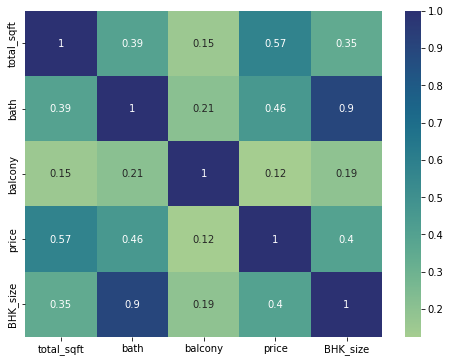

In [52]:
## From plot it is seen that Total_sqft has greater impact on price.
plt.figure(figsize=(8,6))
sns.heatmap(df2.corr(),cmap='crest',annot=True)

In [53]:
df2.shape

(13246, 6)

In [54]:
data=df2.copy() ## Making Copy of df2

In [55]:
data.location.nunique()

1293

In [56]:
data.head()

,location,total_sqft,bath,balcony,price,BHK_size
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


In [57]:
data.dtypes

location       object
total_sqft    float64
bath          float64
balcony       float64
price         float64
BHK_size        int64
dtype: object

In [58]:
data.isnull().sum()

location       0
total_sqft    46
bath           0
balcony        0
price          0
BHK_size       0
dtype: int64

In [59]:
data.dropna(inplace=True) ## Dropping NA Values

In [60]:
data.shape

(13200, 6)

In [61]:
data.head()

,location,total_sqft,bath,balcony,price,BHK_size
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


#### Take the list of all location and replace the location with 'other' where count is <=10

In [62]:
list1=data['location'].value_counts()

In [63]:
list1

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [64]:
less_than_10_list=list1[list1<=10]

In [65]:
less_than_10_list.index

Index(['BTM 1st Stage', 'Gunjur Palya', 'Nagappa Reddy Layout',
       'Sector 1 HSR Layout', 'Thyagaraja Nagar', 'Basapura',
       '1st Block Koramangala', 'Kalkere', 'Naganathapura', 'Dodsworth Layout',
       ...
       '1A Block Koramangala', 'asha township, off hennur road',
       'Escorts Colony', 'Rahat Bagh', 'Nagarbhavi  BDA Complex',
       'Rajanna Layout', 'Subramanyanagar', 'Lakshmipura Vidyaanyapura',
       'Malur Hosur Road', 'Abshot Layout'],
      dtype='object', length=1047)

In [66]:
df_refine=data.copy()

In [67]:
df_refine['location']=df_refine['location'].apply(lambda x: 'other' if x in less_than_10_list.index else x )

In [68]:
df_refine['location'].value_counts()

other              2872
Whitefield          533
Sarjapur  Road      392
Electronic City     304
Kanakpura Road      264
                   ... 
Doddaballapur        11
Tindlu               11
Marsur               11
HAL 2nd Stage        11
Kodigehalli          11
Name: location, Length: 241, dtype: int64

In [69]:
df_refine.shape

(13200, 6)

In [70]:
df_refine.head(2)

,location,total_sqft,bath,balcony,price,BHK_size
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4


In [71]:
df_refine.isnull().sum()

location      0
total_sqft    0
bath          0
balcony       0
price         0
BHK_size      0
dtype: int64

In [72]:
df_refine.describe()

,total_sqft,bath,balcony,price,BHK_size
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,1555.302783,2.691136,1.602348,112.276178,2.800833
std,1237.323445,1.338915,0.804268,149.175995,1.292843
min,1.000000,1.000000,0.000000,8.000000,1.000000
25%,1100.000000,2.000000,1.000000,50.000000,2.000000
50%,1275.000000,2.000000,2.000000,71.850000,3.000000
75%,1672.000000,3.000000,2.000000,120.000000,3.000000
max,52272.000000,40.000000,3.000000,3600.000000,43.000000


In [73]:
df_refine['BHK_size'].value_counts()

2     5517
3     4818
4     1390
1      640
5      349
6      220
7      100
8       88
9       52
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: BHK_size, dtype: int64

In [74]:
## Remove the data where BHK_size is greater than 20

In [75]:
df_refine[(df_refine['BHK_size']>20)]

,location,total_sqft,bath,balcony,price,BHK_size
1718,other,8000.0,27.0,0.0,230.0,27
4684,Munnekollal,2400.0,40.0,0.0,660.0,43


In [76]:
df_refine=df_refine[~(df_refine['BHK_size']>20)] 

#### Will derive new feature 'price_per_sqft' so that we can remove outliers outside of 1 std from mean so that our data is normalisized 

In [77]:
df_refine['price_per_sqft']=round(df_refine['total_sqft']/df_refine['price'],2)

In [78]:
df_refine.head()

,location,total_sqft,bath,balcony,price,BHK_size,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,27.03
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,21.67
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,23.23
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,16.01
4,Kothanur,1200.0,2.0,1.0,51.00,2,23.53


In [79]:
df_refine.describe()

,total_sqft,bath,balcony,price,BHK_size,price_per_sqft
count,13198.000000,13198.000000,13198.000000,13198.000000,13198.000000,13198.000000
mean,1554.750472,2.686468,1.602591,112.225757,2.795954,18.879054
std,1236.122856,1.281675,0.804087,149.107561,1.226723,9.245673
min,1.000000,1.000000,0.000000,8.000000,1.000000,0.010000
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,13.670000
50%,1275.000000,2.000000,2.000000,71.805000,3.000000,18.390000
75%,1671.500000,3.000000,2.000000,120.000000,3.000000,23.430000
max,52272.000000,18.000000,3.000000,3600.000000,19.000000,373.370000


In [80]:
### Applying Mean Plus/Minus Standard Deviation to get the appropriate data on Price/sqft

In [81]:
upper_limit=df_refine['price_per_sqft'].mean()+(df_refine['price_per_sqft'].std())

In [82]:
upper_limit

28.124727368022228

In [83]:
lower_limit=df_refine['price_per_sqft'].mean()-(df_refine['price_per_sqft'].std())

In [84]:
lower_limit

9.633381436342104

In [85]:
df_updated=df_refine[df_refine['price_per_sqft'].between(lower_limit,upper_limit)]

In [86]:
df_updated.shape

(10082, 7)

In [87]:
df_updated.describe()

,total_sqft,bath,balcony,price,BHK_size,price_per_sqft
count,10082.000000,10082.000000,10082.000000,10082.000000,10082.000000,10082.000000
mean,1507.777639,2.540964,1.606229,89.494311,2.639655,18.671828
std,866.986235,1.049777,0.797074,67.504254,0.984044,4.588770
min,276.000000,1.000000,0.000000,13.500000,1.000000,9.640000
25%,1115.000000,2.000000,1.000000,53.000000,2.000000,15.020000
50%,1300.000000,2.000000,2.000000,70.000000,3.000000,18.530000
75%,1655.000000,3.000000,2.000000,101.000000,3.000000,22.220000
max,30400.000000,16.000000,3.000000,2100.000000,16.000000,28.120000


In [88]:
df_updated.head()

,location,total_sqft,bath,balcony,price,BHK_size,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,27.03
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,21.67
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,23.23
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,16.01
4,Kothanur,1200.0,2.0,1.0,51.00,2,23.53


In [89]:
df_updated.shape

(10082, 7)

In [90]:
### We can Drop now Price_per_sqft as we have cleaned the data 

In [91]:
df_updated.drop('price_per_sqft',axis=1,inplace=True)

In [92]:
df_updated.head(2)

,location,total_sqft,bath,balcony,price,BHK_size
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4


In [93]:
## Now we will convert the location to one_hot_enocing

In [94]:
df_one_hot_location=pd.get_dummies(df_updated['location'])

In [95]:
df_one_hot_location.shape

(10082, 240)

In [96]:
## Creating Our final Cleaned and processed Data for model building

In [97]:
df_final=pd.concat([df_updated,df_one_hot_location],axis=1)

In [98]:
df_final.head()

,location,total_sqft,bath,balcony,price,BHK_size,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,1200.0,2.0,1.0,51.00,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
df_final.drop('location',axis=1,inplace=True)

In [100]:
df_final.shape

(10082, 245)

## Model Building

In [101]:
from sklearn.linear_model import LinearRegression

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score,r2_score

In [104]:
x=df_final.drop('price',axis=1)
y=df_final['price']

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=25)

In [106]:
lg=LinearRegression()

In [107]:
lg.fit(x_train,y_train)

LinearRegression()

In [108]:
lg.score(x_test,y_test)

0.880284666984234

In [109]:
y_pred=lg.predict(x_test)

In [110]:
mean_squared_error(y_test,y_pred)

689.1190773763136

In [111]:
explained_variance_score(y_test,y_pred)

0.880300782789749

In [112]:
r2_score(y_test,y_pred)

0.880284666984234

In [113]:
### Predcit Price By using Location,area,bathroom,balcony and BHK

In [114]:
def price_estimate(location,total_sqft,bath,balcony,BHK_size):
    loc_index=np.where(x.columns==location)[0][0]
    p=np.zeros(len(x.columns))
    p[0]=total_sqft
    p[1]=bath
    p[2]=balcony
    p[3]=BHK_size
    if loc_index>=0:
        p[loc_index]=1
        
    return lg.predict([p])[0]

In [115]:
price_estimate('Electronic City Phase II',1000,2,2,2)

45.612271983779664

In [116]:
price_estimate('Whitefield',1800,3,2,3)

111.9728637270026

In [117]:
price_estimate('Sarjapur  Road',1500,2,2,3)

88.35330977482121

In [118]:
price_estimate('Chikka Tirupathi',2600,4,2,3)

120.38085963625831